# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import  pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()
        #pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | mao
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | telde
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | sobolevo
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | yaan
Processing Record 14 of Set 1 | mogadishu
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | lofthus
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | henties bay
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | ucluelet
Processing Record 22 of Set 1 | arroyo
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,16.38,44,28,2.48,NZ,1681007834
1,mao,39.8885,4.2658,8.31,93,0,1.54,ES,1681007835
2,codrington,-38.2667,141.9667,13.52,64,100,6.63,AU,1681007517
3,telde,27.9924,-15.4192,17.12,68,75,5.14,ES,1681007835
4,victoria,22.2855,114.1577,19.58,85,54,0.89,HK,1681007434


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,16.38,44,28,2.48,NZ,1681007834
1,mao,39.8885,4.2658,8.31,93,0,1.54,ES,1681007835
2,codrington,-38.2667,141.9667,13.52,64,100,6.63,AU,1681007517
3,telde,27.9924,-15.4192,17.12,68,75,5.14,ES,1681007835
4,victoria,22.2855,114.1577,19.58,85,54,0.89,HK,1681007434


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

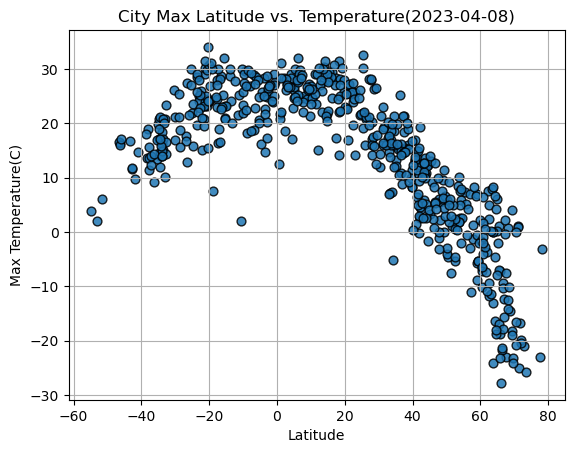

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Max Latitude vs. Temperature(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

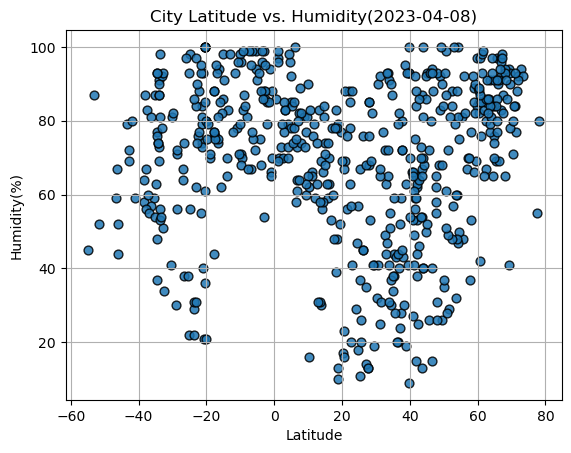

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Humidity(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

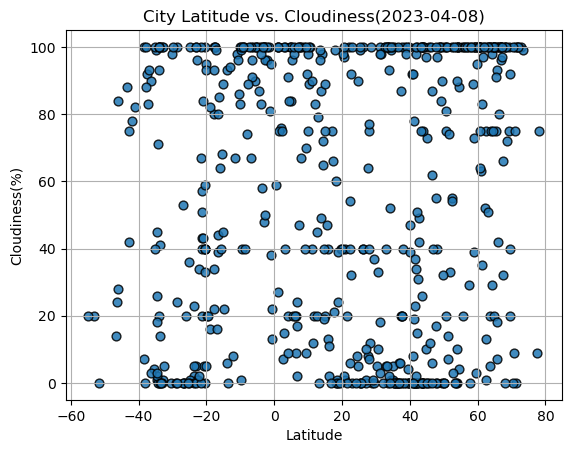

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Cloudiness(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

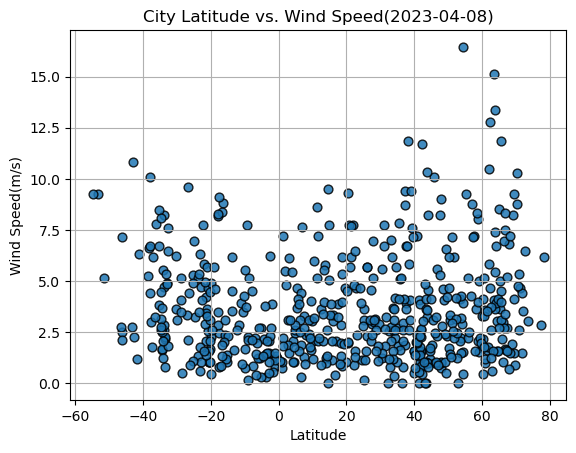

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],s=40,edgecolors='black',alpha=.85)

# Incorporate the other graph properties
#-- Set title for the scatter plot
plt.title("City Latitude vs. Wind Speed(2023-04-08)")

#-- Set axis lable for the scatter plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

#-- Set grid line for the scatter plot
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Ref: Module6 - Day 2 - Activities\07-Stu_Weather_Stats

# Define a function to create Linear Regression plots
def CreateLinearRegressionPlotwithLat(dataFrame,yaxis_colName):
    
    #Get the latitute from the dataframe
    latitude = dataFrame['Lat']

    # Calculate the linear regression model 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, 
                                                            dataFrame[yaxis_colName])
    # Get regression values
    regress_values = latitude * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Generating scatter plot
    plt.scatter(latitude, dataFrame[yaxis_colName], s=40,edgecolors='black',alpha=.85)
    plt.plot(latitude,regress_values,"r-")

    #-- Set axis lable for the scatter plot
    plt.xlabel("Latitude")
    plt.ylabel(yaxis_colName)

    # annotate the line equation
    # For clear visiblity model's formula is displayed at the left top corner of the plot
    # Ref: https://matplotlib.org/1.5.3/users/annotations_intro.html
    plt.annotate(line_eq,xy=(0, 1), xycoords='figure fraction',fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.query('Lat >= 0'))

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mao,39.8885,4.2658,8.31,93,0,1.54,ES,1681007835
3,telde,27.9924,-15.4192,17.12,68,75,5.14,ES,1681007835
4,victoria,22.2855,114.1577,19.58,85,54,0.89,HK,1681007434
5,kapaa,22.0752,-159.3190,25.99,88,100,7.72,US,1681007835
6,sobolevo,54.4299,31.8996,5.78,75,88,1.52,RU,1681007505


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.query('Lat < 0'))

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,16.38,44,28,2.48,NZ,1681007834
2,codrington,-38.2667,141.9667,13.52,64,100,6.63,AU,1681007517
7,grand gaube,-20.0064,57.6608,24.10,80,95,2.24,MU,1681007501
8,avarua,-21.2078,-159.7750,29.03,74,40,3.60,CK,1681007477
9,souillac,-20.5167,57.5167,23.21,100,40,1.03,MU,1681007836


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.789267141425172


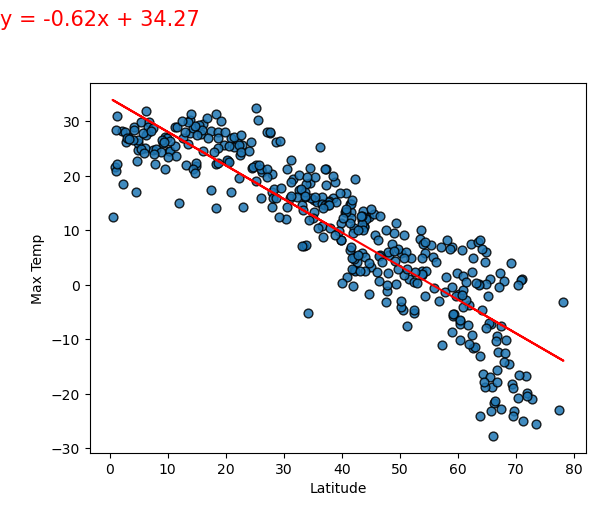

In [114]:
# Linear regression on Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Max Temp')

The r-value is: 0.36662312693112326


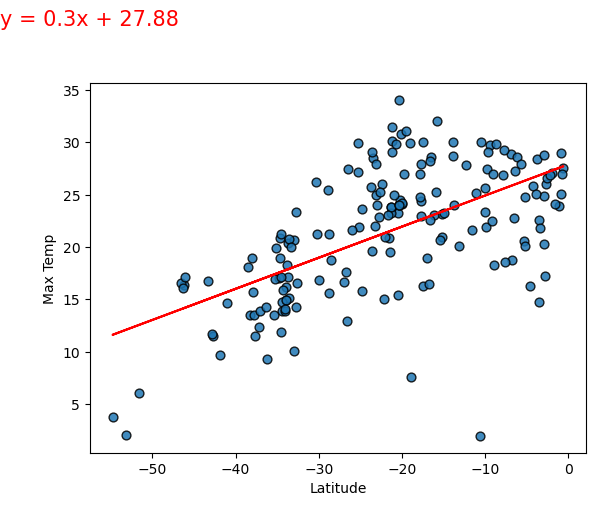

In [115]:
# Linear regression on Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04341911761366207


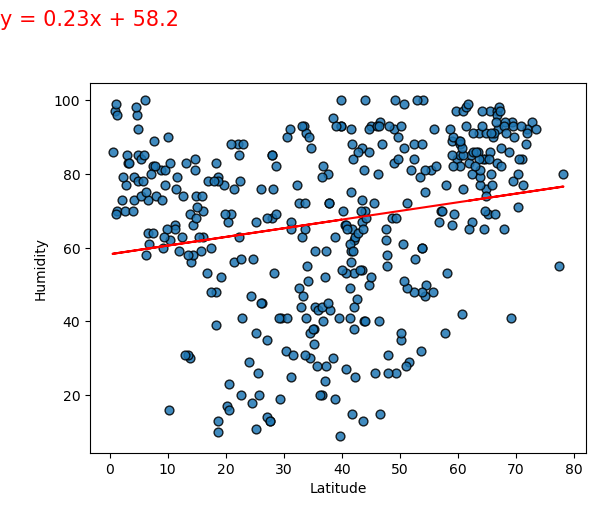

In [116]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Humidity')

The r-value is: 0.11486406686913304


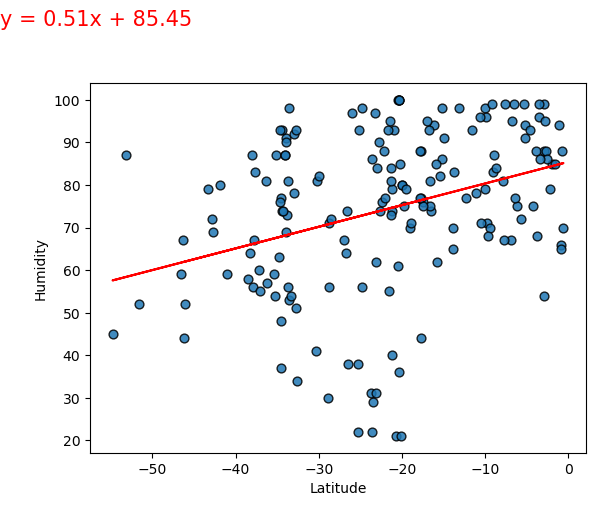

In [117]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.020654486315089385


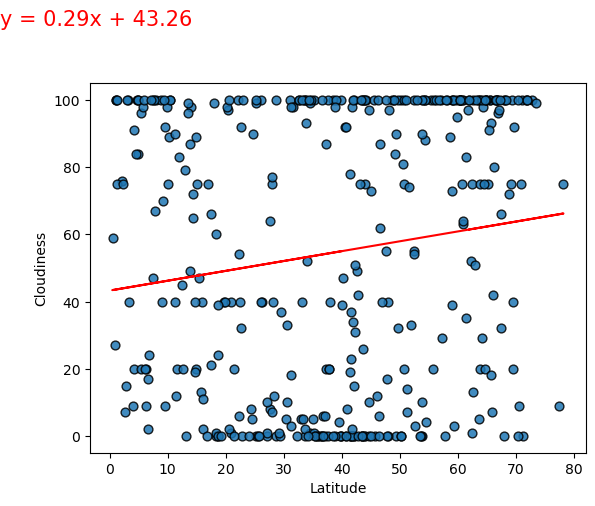

In [118]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Cloudiness')

The r-value is: 0.10738754834923539


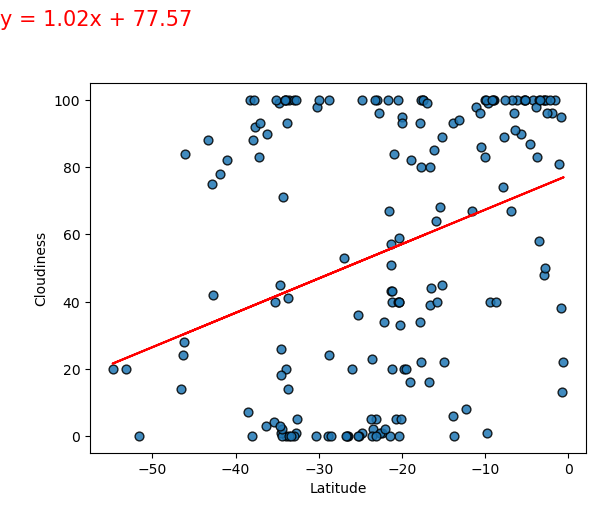

In [119]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.022633435912298897


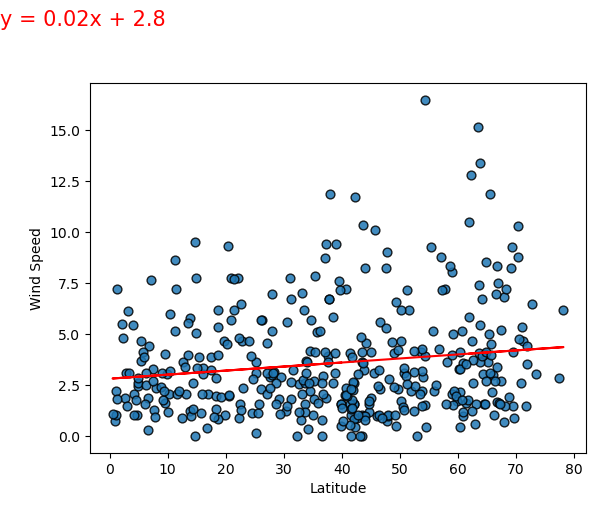

In [120]:
# Northern Hemisphere
CreateLinearRegressionPlotwithLat(northern_hemi_df,'Wind Speed')

The r-value is: 0.16089105363277095


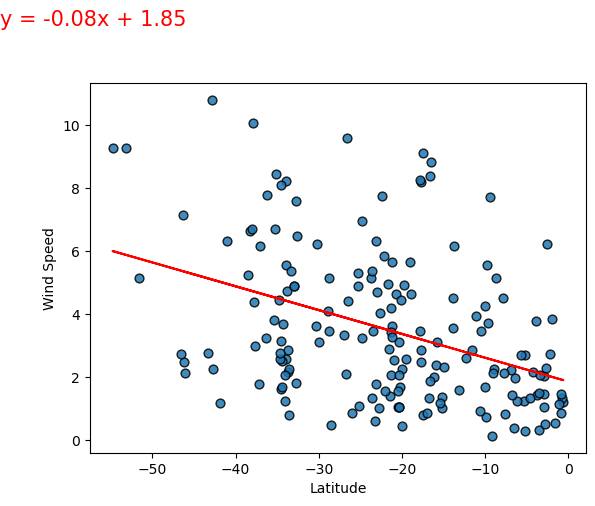

In [121]:
# Southern Hemisphere
CreateLinearRegressionPlotwithLat(southern_hemi_df,'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE